In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

## Comes with data sets

  ####### nltk.download_shell()

## Package we need
- words

In [13]:
messages = [x.rstrip() for x in open("SMSSpamCollection", "r")]

In [14]:
len(messages)

5574

In [15]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [18]:
for messNumber, message in enumerate(messages):
    print(f"{messNumber} \n")
    print(f"{message}")

0 

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 

ham	Ok lar... Joking wif u oni...
2 

spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 

ham	U dun say so early hor... U c already then say...
4 

ham	Nah I don't think he goes to usf, he lives around here though
5 

spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 

ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 

ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 

spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim cod

## We want to detect spam for not spam message
\t: tab separated values

In [19]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [21]:
df = pd.read_csv("SMSSpamCollection", sep="\t", names=["label","Messages"])

<AxesSubplot:xlabel='label', ylabel='count'>

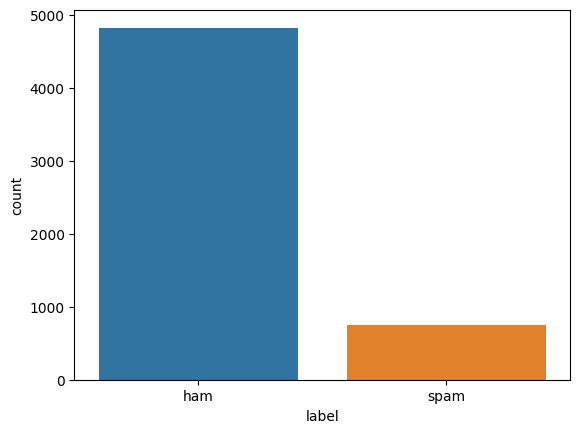

In [24]:
sns.countplot(x = df["label"])

In [25]:
df.describe()

,label,Messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [28]:
df.groupby("label").describe()

Messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [31]:
df["length"] = df["Messages"].apply(lambda x: len(x))

In [33]:
df

,label,Messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<AxesSubplot:ylabel='Frequency'>

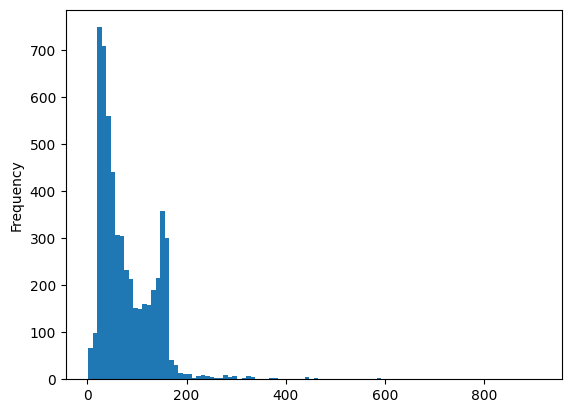

In [38]:
df['length'].plot(kind = "hist", bins = 100)

In [46]:
df[df["length"] == 910]["Messages"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

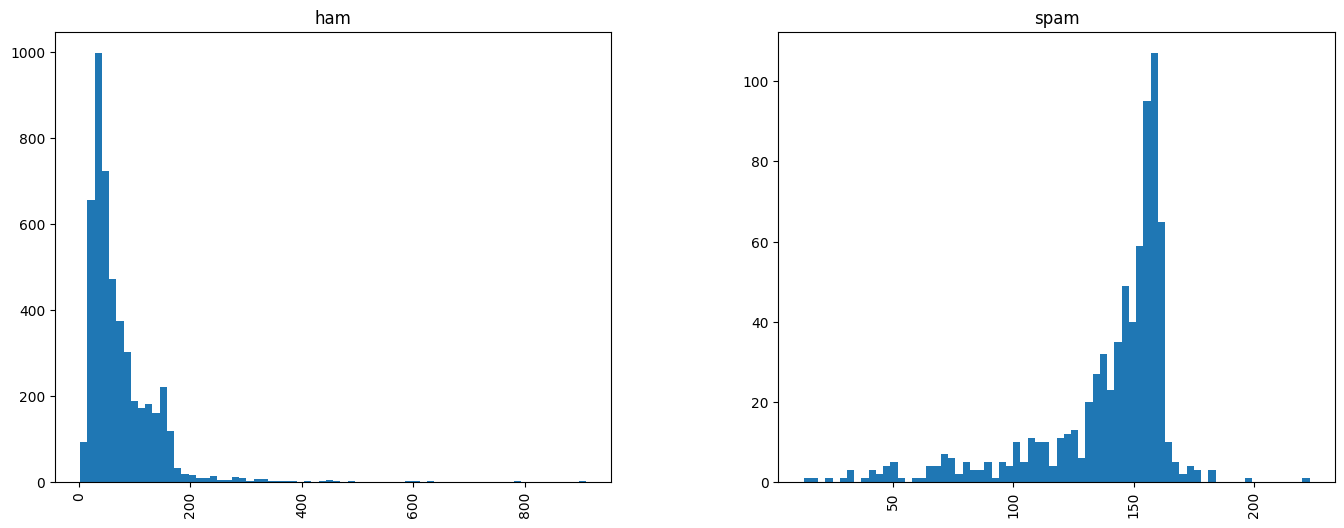

In [48]:
df.hist(column="length", by = "label", bins = 70, figsize=(16,6))

## Remove Punutation

In [49]:
import string

In [68]:
mes = "Berkat! . you are not ? here."

In [69]:
noPunc = [x for x in mes if x not in string.punctuation]

## Stop Words removal
- words that do not tell you distingunshing features

In [70]:
from nltk.corpus import stopwords

In [71]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [72]:
noPunc = "".join(noPunc)

In [73]:
noPunc

'Berkat  you are not  here'

In [74]:
noPunc.split()

['Berkat', 'you', 'are', 'not', 'here']

In [75]:
cleanMessage = [word for word in noPunc.split() if word.lower() not in stopwords.words("english") ]

In [76]:
cleanMessage

['Berkat']

## Create function to handle

In [77]:
def process(message):
    """
    1 remove punc
    2: remove stop words
    3: return list of cleaned words
    """
    noPunc = [x for x in message if x not in string.punctuation]
    noPunc = "".join(noPunc)
    
    return [word for word in noPunc.split() if word.lower() if word not in stopwords.words("english")]

In [78]:
df.head()

,label,Messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Tokenize messages
- Converting into tokens
- clean version
- Remove stop Words and token this

In [81]:
df["Messages"].head(5).apply(lambda x: process(x))

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: Messages, dtype: object

## Other methods in  NLTK 
-> Stemming: if yout text has similar words, running ran run -> Same thing but different:  
-> we can do this later for this data set
-> Vacorizing

## WE need to conver each mesage into a vector
- each vecotr ill have as may dims as there are works in the vector
- SKLearn count vecorizer: estimator: Convert to a collection of text doc to a matrix  of token count:  

###### Count how manyy times a word appears
###### Weigh the counts: so the fequent tokes get lower weights
###### Normalize the vector 

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
bowTransformer = CountVectorizer(analyzer=process).fit(df["Messages"])

In [89]:
print(len(bowTransformer.vocabulary_))

11617


In [90]:
mess4 = df["Messages"][3]

In [91]:
print(mess4)

U dun say so early hor... U c already then say...


In [93]:
bow4 = bowTransformer.transform([mess4])

In [94]:
print(bow4)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [96]:
  bowTransformer.get_feature_names_out()[4221]

'U'

In [97]:
  bowTransformer.get_feature_names_out()[9746]

'say'

## Obsering Matrix
- transforming all words to a sparse matrix
- message bags of words

In [98]:
messageBow = bowTransformer.transform(df["Messages"])

In [99]:
print(messageBow.shape)

(5572, 11617)


## Term weights and Normalization 
- using TF-IDF 
- Weight value for each of these words

In [100]:
from sklearn.feature_extraction.text import TfidfTransformer

In [101]:
tfidf_Trans = TfidfTransformer().fit(messageBow)

In [102]:
tfidf4 = tfidf_Trans.transform(bow4)

In [104]:
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [105]:
tfidf_Trans.idf_[bowTransformer.vocabulary_["university"]]

8.527076498901426

## Convert the entire bow to tfidf

In [106]:
messages_tfidf = tfidf_Trans.transform(messageBow)

In [108]:
print(messages_tfidf)

  (0, 11355)	0.23026685592418913
  (0, 11157)	0.19073428545061483
  (0, 9109)	0.24704652376837993
  (0, 8528)	0.17046869292195632
  (0, 7860)	0.26403384065473806
  (0, 7747)	0.31253856260694546
  (0, 7129)	0.1834692413608692
  (0, 7098)	0.15158474664662352
  (0, 6409)	0.18915557732842803
  (0, 5961)	0.24984711892976424
  (0, 5410)	0.26870593862526665
  (0, 5409)	0.29835184088197164
  (0, 4845)	0.31253856260694546
  (0, 2113)	0.24203960256420656
  (0, 1521)	0.31253856260694546
  (0, 1133)	0.2882862016308418
  (1, 11264)	0.40061560982443056
  (1, 10890)	0.2063637481323008
  (1, 8782)	0.5043405901305854
  (1, 7893)	0.3767401070812794
  (1, 3177)	0.2911995411244838
  (1, 2535)	0.561988811929381
  (2, 11315)	0.19104387220509106
  (2, 11276)	0.15898145347176754
  (2, 10878)	0.13995540820792943
  :	:
  (5568, 4502)	0.37279231516513645
  (5569, 10391)	0.520467167163554
  (5569, 8444)	0.4328299709057074
  (5569, 3852)	0.520467167163554
  (5569, 3349)	0.520467167163554
  (5570, 11198)	0.19900501

## Classifier
- Training all the data for predictions

In [109]:
from sklearn.naive_bayes import MultinomialNB

In [111]:
spamDetectModel = MultinomialNB().fit(messages_tfidf, df["label"])

In [114]:
spamDetectModel.predict(tfidf4)[0]

'ham'

In [115]:
predictions = spamDetectModel.predict(messages_tfidf)

In [116]:
predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

## Train TEst Split

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
messageTrain, mesageTest, label_train, label_test = train_test_split(df["Messages"], df["label"], test_size=0.3)

In [119]:
messageTrain

2124    +123 Congratulations - in this week's competit...
1117    Hey... What time is your driving on fri? We go...
2211    Just wanted to say holy shit you guys weren't ...
4643    You are being ripped off! Get your mobile cont...
1026     I have a sore throat. It's scratches when I talk
                              ...                        
2281                           R ü comin back for dinner?
1988                     No calls..messages..missed calls
1240    Hope you are having a great new semester. Do w...
2956    Id have to check but there's only like 1 bowls...
1655    Wishing you and your family Merry "X" mas and ...
Name: Messages, Length: 3900, dtype: object

In [120]:
mesageTest

5158    I will come with karnan car. Please wait till ...
4668                           I send the print  outs da.
3766    Someone U know has asked our dating service 2 ...
5122    NOT ENUFCREDEIT TOCALL.SHALL ILEAVE UNI AT 6 +...
877          Are you in castor? You need to see something
                              ...                        
140     Got c... I lazy to type... I forgot ü in lect....
139     You'll not rcv any more msgs from the chat svc...
1141            Oh:)as usual vijay film or its different?
3446    wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
264     Hey I am really horny want to chat or see me n...
Name: Messages, Length: 1672, dtype: object

## Sklearn pipeline
- takes in a list of everying you want to do

In [121]:
from sklearn.pipeline import Pipeline

In [122]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process)),
    ('tfidf',TfidfTransformer()),
    ("classifier", MultinomialNB())
])

## Pass to the pipeline 
- all will be handled 

In [123]:
pipeline.fit(messageTrain, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x7fc1751a8320>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [124]:
predictions = pipeline.predict(mesageTest)

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1519
        spam       0.70      1.00      0.82       153

    accuracy                           0.96      1672
   macro avg       0.85      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672

